In [1]:
import datetime
print(f'Notebook last run(end-to-end):{datetime.datetime.now()}')

Notebook last run(end-to-end):2024-05-21 18:16:39.415469


In [7]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref=zipfile.ZipFile('pizza_steak.zip','r')
zip_ref.extractall()
zip_ref.close()

--2024-05-21 18:21:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.115.207, 142.250.114.207, 142.250.113.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.1'

     0K .......... .......... .......... .......... ..........  0%  802K 2m13s
    50K .......... .......... .......... .......... ..........  0% 1.64M 98s
   100K .......... .......... .......... .......... ..........  0% 3.14M 77s
   150K .......... .......... .......... .......... ..........  0% 2.46M 68s
   200K .......... .......... .......... .......... ..........  0% 14.8M 56s
   250K .......... .......... .......... .......... ..........  0% 6.30M 49s
   300K .......... .......... .......... .......... ..........  0% 7.34M 44s
   350K .......... .......

In [8]:
import os
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [9]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train/')
class_name=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    
    return img

Image shape:(512, 512, 3)


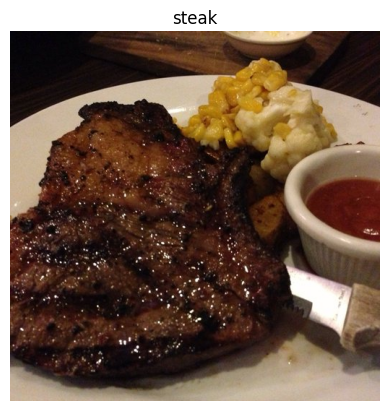

In [11]:
img=view_random_image(target_dir='pizza_steak/train/',
                      target_class='steak')

In [12]:
img

array([[[  3,   3,  13],
        [  3,   3,  13],
        [  3,   3,  11],
        ...,
        [ 21,  14,   8],
        [ 21,  14,   6],
        [ 21,  14,   6]],

       [[  4,   4,  14],
        [  4,   4,  14],
        [  4,   4,  12],
        ...,
        [ 20,  13,   7],
        [ 20,  13,   5],
        [ 20,  13,   5]],

       [[  5,   5,  15],
        [  5,   5,  15],
        [  5,   5,  13],
        ...,
        [ 22,  13,   8],
        [ 22,  13,   6],
        [ 22,  13,   6]],

       ...,

       [[198, 176, 152],
        [198, 176, 152],
        [200, 178, 154],
        ...,
        [200, 176, 166],
        [198, 174, 164],
        [197, 173, 163]],

       [[197, 176, 149],
        [197, 176, 149],
        [199, 177, 153],
        ...,
        [200, 176, 166],
        [199, 174, 167],
        [197, 172, 165]],

       [[199, 178, 151],
        [198, 177, 150],
        [197, 175, 151],
        ...,
        [206, 182, 172],
        [205, 180, 173],
        [203, 178, 171]]

In [13]:
img/255

array([[[0.01176471, 0.01176471, 0.05098039],
        [0.01176471, 0.01176471, 0.05098039],
        [0.01176471, 0.01176471, 0.04313725],
        ...,
        [0.08235294, 0.05490196, 0.03137255],
        [0.08235294, 0.05490196, 0.02352941],
        [0.08235294, 0.05490196, 0.02352941]],

       [[0.01568627, 0.01568627, 0.05490196],
        [0.01568627, 0.01568627, 0.05490196],
        [0.01568627, 0.01568627, 0.04705882],
        ...,
        [0.07843137, 0.05098039, 0.02745098],
        [0.07843137, 0.05098039, 0.01960784],
        [0.07843137, 0.05098039, 0.01960784]],

       [[0.01960784, 0.01960784, 0.05882353],
        [0.01960784, 0.01960784, 0.05882353],
        [0.01960784, 0.01960784, 0.05098039],
        ...,
        [0.08627451, 0.05098039, 0.03137255],
        [0.08627451, 0.05098039, 0.02352941],
        [0.08627451, 0.05098039, 0.02352941]],

       ...,

       [[0.77647059, 0.69019608, 0.59607843],
        [0.77647059, 0.69019608, 0.59607843],
        [0.78431373, 0

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir='pizza_steak/train/'
test_dir='pizza_steak/test/'

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)


model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      epochs=6,
                      #steps_per_epoch=len(train_data), with this term, there is an error
                      validation_data=valid_data
                      )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6414 - loss: 0.6248 - val_accuracy: 0.7760 - val_loss: 0.4855
Epoch 2/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7751 - loss: 0.4708 - val_accuracy: 0.8460 - val_loss: 0.3818
Epoch 3/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8242 - loss: 0.4195 - val_accuracy: 0.8360 - val_loss: 0.3960
Epoch 4/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.8564 - loss: 0.3452 - val_accuracy: 0.8560 - val_loss: 0.3290
Epoch 5/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9004 - loss: 0.2508 - val_accuracy: 0.8420 - val_loss: 0.3392
Epoch 6/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9304 - loss: 0.1760 - val_accuracy: 0.8460 - val_loss: 0.3547


In [40]:
model_1.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data)  # use same validation data created above
                        #validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4783 - loss: 0.8691 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4880 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5309 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


In [43]:
model_2.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data)
                        # validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5673 - loss: 5.7606 - val_accuracy: 0.7680 - val_loss: 0.7150
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7056 - loss: 1.0784 - val_accuracy: 0.7740 - val_loss: 0.5052
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7381 - loss: 0.6170 - val_accuracy: 0.7600 - val_loss: 0.5160
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7371 - loss: 0.5479 - val_accuracy: 0.7960 - val_loss: 0.4578
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7829 - loss: 0.4627 - val_accuracy: 0.7780 - val_loss: 0.4600


In [45]:
model_3.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

<Axes: >

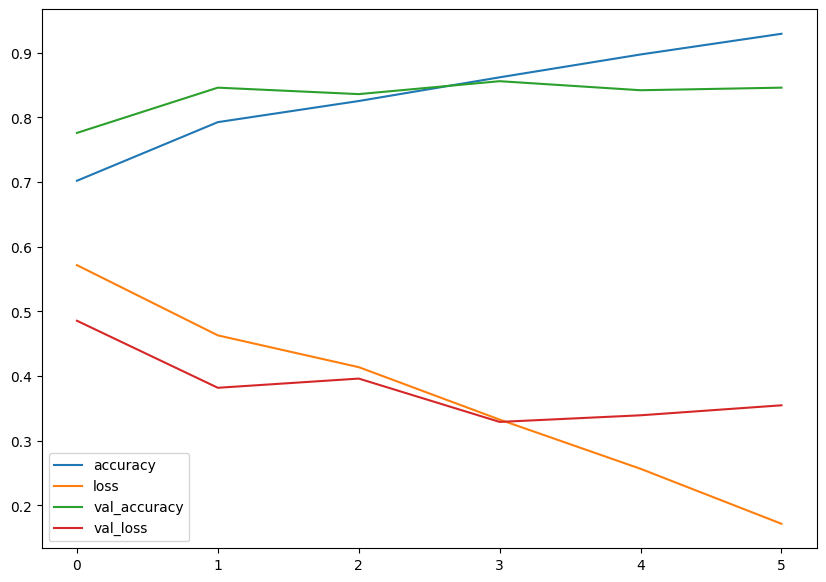

In [46]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [47]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

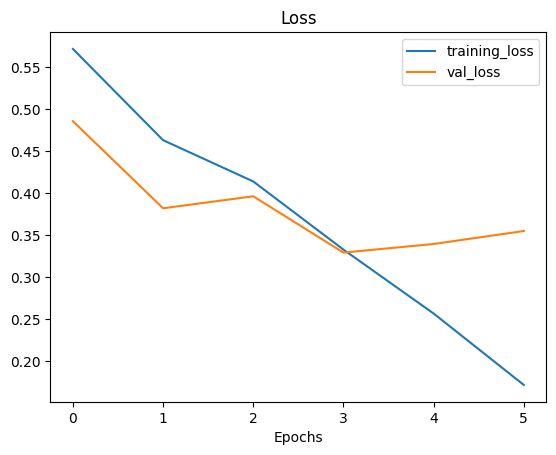

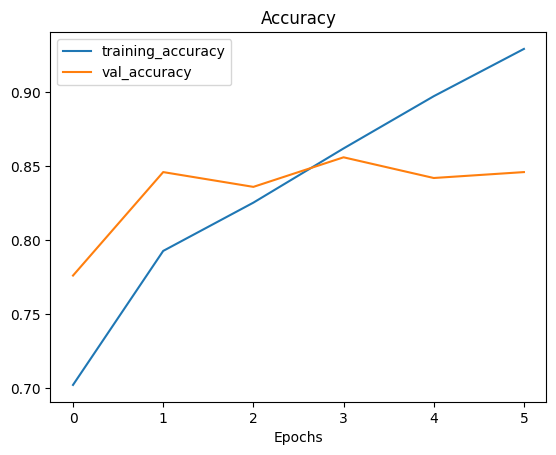

In [48]:
plot_loss_curves(history_1)

In [51]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [52]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [53]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [58]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        #steps_per_epoch=len(train_data),
                        validation_data=valid_data)
                        #validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8456 - loss: 0.3610 - val_accuracy: 0.8640 - val_loss: 0.3185
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8567 - loss: 0.3472 - val_accuracy: 0.8640 - val_loss: 0.3087
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8555 - loss: 0.3445 - val_accuracy: 0.8760 - val_loss: 0.3045
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.8798 - loss: 0.3012 - val_accuracy: 0.8700 - val_loss: 0.3248
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8730 - loss: 0.3164 - val_accuracy: 0.8740 - val_loss: 0.2949


In [59]:
# Check out the model architecture
model_5.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

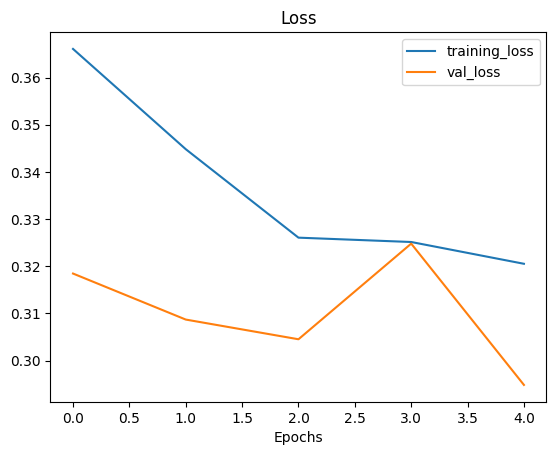

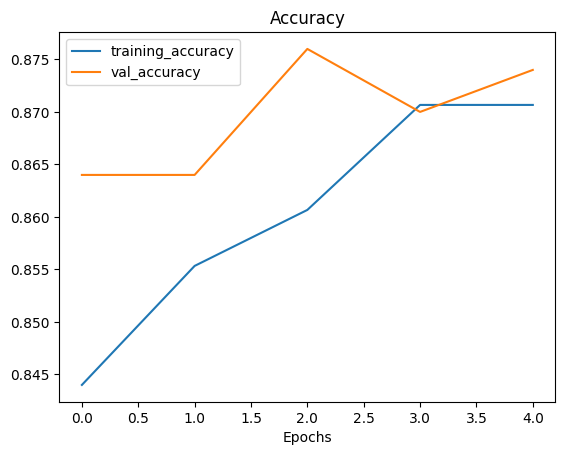

In [60]:
plot_loss_curves(history_5)

In [61]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [62]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [65]:
# 使用 Python 的内置 next 函数
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)


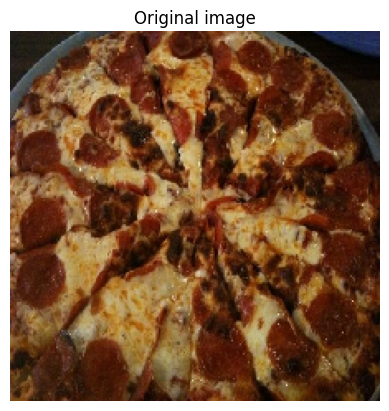

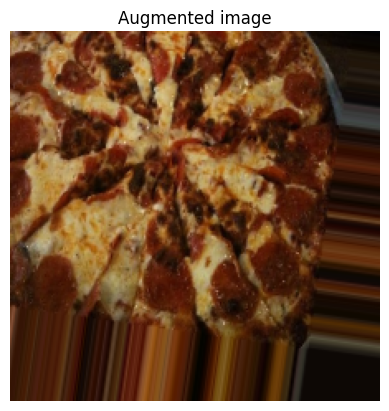

In [66]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

--2024-05-21 20:12:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: '03-steak.jpeg'

     0K .......... .......... .......... .......... ..........  2% 4.32M 0s
    50K .......... .......... .......... .......... ..........  5% 8.14M 0s
   100K .......... .......... .......... .......... ..........  7% 6.18M 0s
   150K .......... .......... .......... .......... .......... 10% 10.5M 0s
   200K .......... .......... .......... .......... .......... 12% 21.6M 0s
   250K .......... .......... .......... .......... .......... 15% 10.2M 0s
   300K .......... .......... .......... .......... .......... 18% 29.0M 0s
   350K ....

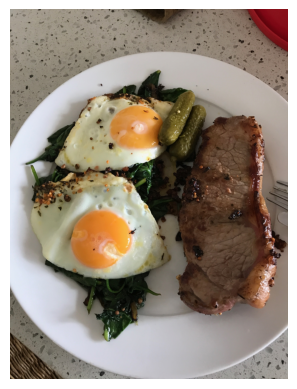

In [67]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [68]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [76]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak=tf.expand_dims(steak, axis=0)
steak,steak.shape

(<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.6377451 , 0.6220588 , 0.57892156],
          [0.6504902 , 0.63186276, 0.5897059 ],
          [0.63186276, 0.60833335, 0.5612745 ],
          ...,
          [0.52156866, 0.05098039, 0.09019608],
          [0.49509802, 0.04215686, 0.07058824],
          [0.52843136, 0.07745098, 0.10490196]],
 
         [[0.6617647 , 0.6460784 , 0.6107843 ],
          [0.6387255 , 0.6230392 , 0.57598037],
          [0.65588236, 0.63235295, 0.5852941 ],
          ...,
          [0.5352941 , 0.06862745, 0.09215686],
          [0.529902  , 0.05931373, 0.09460784],
          [0.5142157 , 0.05539216, 0.08676471]],
 
         [[0.6519608 , 0.6362745 , 0.5892157 ],
          [0.6392157 , 0.6137255 , 0.56764704],
          [0.65637255, 0.6269608 , 0.5828431 ],
          ...,
          [0.53137255, 0.06470589, 0.08039216],
          [0.527451  , 0.06862745, 0.1       ],
          [0.52254903, 0.05196078, 0.0872549 ]],
 
         ...,
 
       

In [78]:
pred=model_1.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.8826584]], dtype=float32)